In [1]:
import numpy as np
import matplotlib.pyplot as plt

L, T, a, Nx, Nt = 0, 0, 0, 0, 0
with open('task/param.dat', 'r') as f:
    L, T, a, Nx, Nt = map(float, f.readline().split())


print(f'L = {L}, T = {T}, a = {a}, Nx = {Nx}, Nt = {Nt}')


def analytical_solution(x, t, L=L, A=a):
    alpha = A * (np.pi**2) / (L**2)
    M = (L**2) / (np.pi**2 * A)  
    return np.sin(np.pi * x / L) * (M + (1 - M)*np.exp(-alpha*t))

L = 100.0, T = 10.0, a = 0.1, Nx = 16384.0, Nt = 89467.0


['result_t0.50.dat', 'result_t1.00.dat', 'result_t1.50.dat', 'result_t2.00.dat', 'result_t2.50.dat', 'result_t3.00.dat', 'result_t3.50.dat', 'result_t4.00.dat', 'result_t4.50.dat', 'result_t5.00.dat', 'result_t5.50.dat', 'result_t6.00.dat', 'result_t6.50.dat', 'result_t7.00.dat', 'result_t7.50.dat', 'result_t8.00.dat', 'result_t8.50.dat', 'result_t9.00.dat', 'result_t9.50.dat', 'result_t10.00.dat']


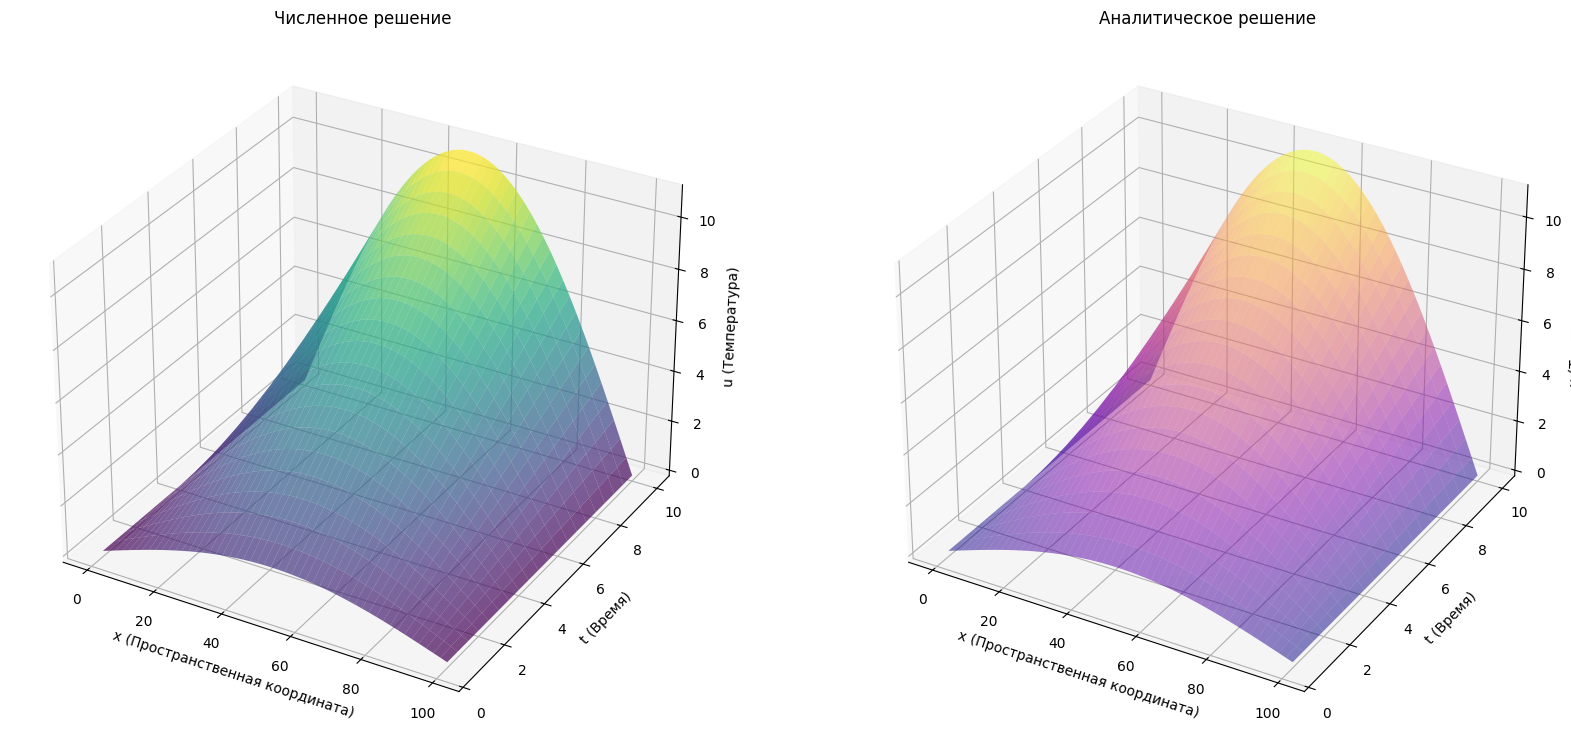

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(0, L, int(Nx))  
t_values = []  
temperature_data = []  
all_times = []

t_values = np.linspace(0, T, int(Nt))

# Считываем все файлы с результатами
filenames = []
for filename in os.listdir("task"):
    if filename.startswith("result_t") and filename.endswith(".dat"):
        filenames.append(filename)

filenames.sort(key=lambda x: float(x.split('_t')[1].split('.dat')[0]))

print(filenames)
for filename in filenames:      
    try:
        data = np.loadtxt(f"task/{filename}") 
        time = float(filename.split('_t')[1].split('.dat')[0])
        all_times.append(time)
        temperature_data.append(data[:, 1])  
    except FileNotFoundError:
        print(f"Файл {filename} не найден, пропускаем.")
        continue


# Построение графика
all_times = np.array(all_times)
T_grid, X_grid = np.meshgrid(all_times, x)  
Z_grid = np.array(temperature_data).T  
fig = plt.figure(figsize=(20, 14))

Z_exact = np.array([analytical_solution(x, t) for t in all_times]).T

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_grid, T_grid, Z_grid, cmap='viridis', alpha=0.7)
ax1.set_xlabel("x (Пространственная координата)")
ax1.set_ylabel("t (Время)")
ax1.set_zlabel("u (Температура)")
ax1.set_title("Численное решение")


ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_grid, T_grid, Z_exact, cmap='plasma', alpha=0.5)
ax2.set_xlabel("x (Пространственная координата)")
ax2.set_ylabel("t (Время)")
ax2.set_zlabel("u (Температура)")
ax2.set_title("Аналитическое решение")

plt.show()
all_times = np.array(all_times)
all_times = np.unique(all_times)

Plotting numerical solution at time 0.5
error at time 0.5 is 0.006550856321252855
Plotting numerical solution at time 3.5
error at time 3.5 is 0.00879443650274178


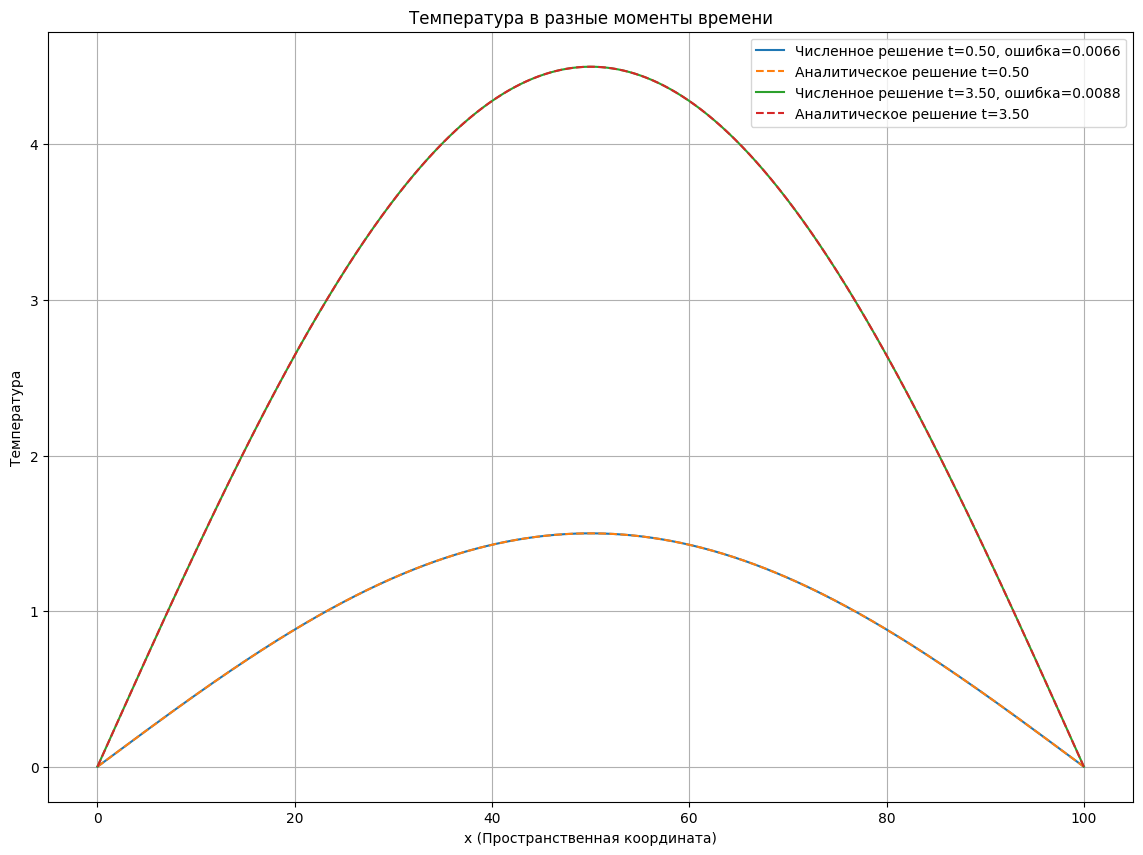

In [3]:
plt.figure(figsize=(14, 10))
selected_idx = [0 ,6]
for j in selected_idx:
    print(f"Plotting numerical solution at time {all_times[j]}")
    error = np.linalg.norm(temperature_data[j] - analytical_solution(x, all_times[j]))
    plt.plot(x, temperature_data[j], label=f'Численное решение t={all_times[j]:.2f}, ошибка={error:.4f}')
    plt.plot(x, analytical_solution(x, all_times[j]), '--', label=f'Аналитическое решение t={all_times[j]:.2f}')
    print(f"error at time {all_times[j]} is {error}")

plt.xlabel('x (Пространственная координата)')
plt.ylabel('Температура')
plt.title('Температура в разные моменты времени')
plt.legend()
plt.grid(True)
plt.show()


error at time 0.5 is 0.006550856321252855
error at time 3.5 is 0.00879443650274178


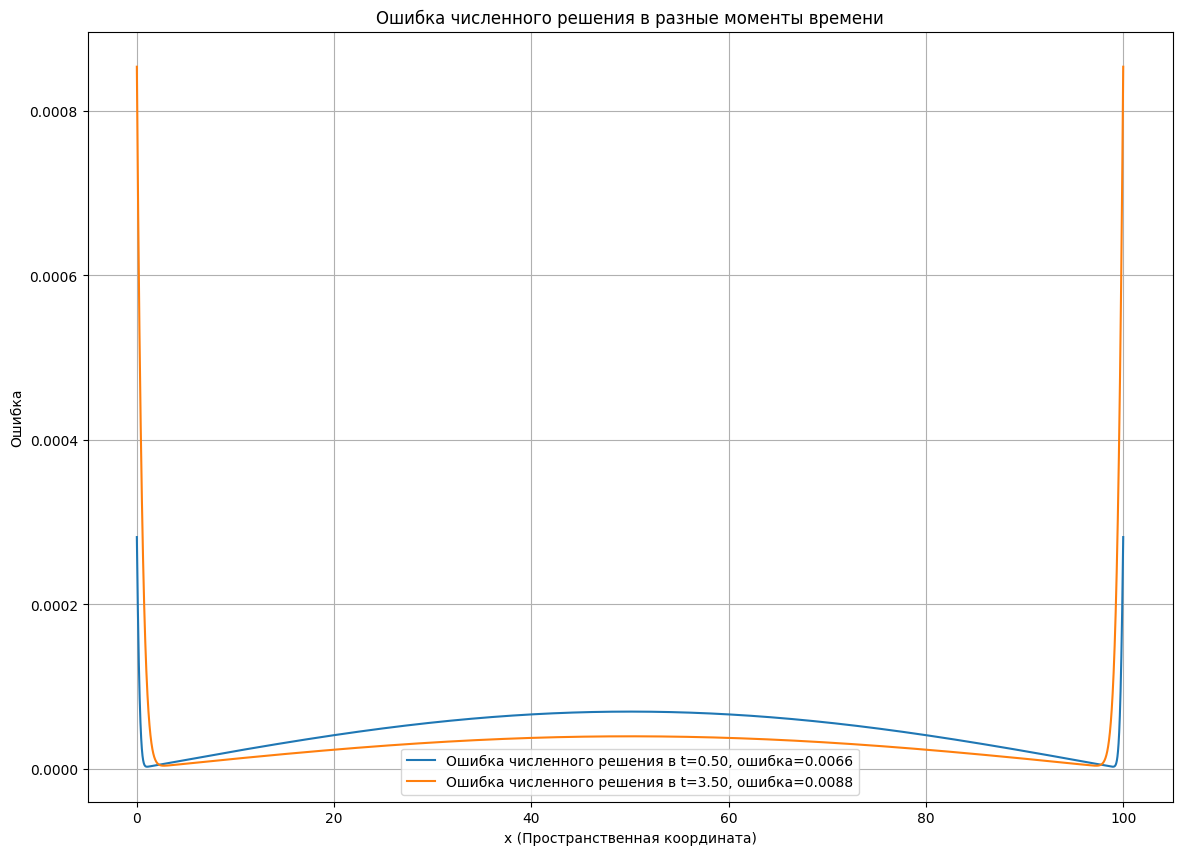

In [4]:
plt.figure(figsize=(14, 10))
for j in selected_idx:
    error = np.linalg.norm(temperature_data[j] - analytical_solution(x, all_times[j]))
    
    plt.plot(x, temperature_data[j] - analytical_solution(x, all_times[j]), label=f'Ошибка численного решения в t={all_times[j]:.2f}, ошибка={error:.4f}')
    print(f"error at time {all_times[j]} is {error}")
    
plt.xlabel('x (Пространственная координата)')
plt.ylabel('Ошибка')
plt.title('Ошибка численного решения в разные моменты времени')
plt.legend()
plt.grid(True)
plt.show()

# Построение графиков эффективности алгоритма 

Processes         1.000000
Nx_global     16384.000000
Total_Time       35.986807
Name: 0, dtype: float64


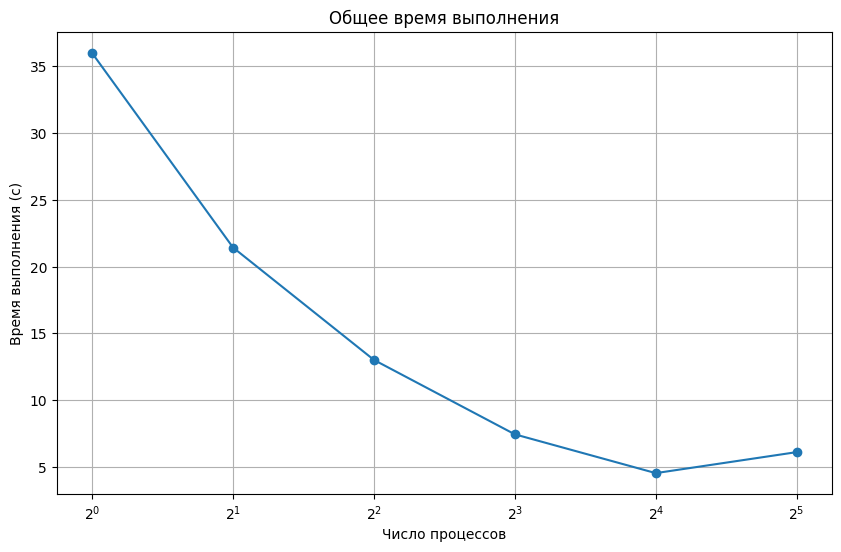

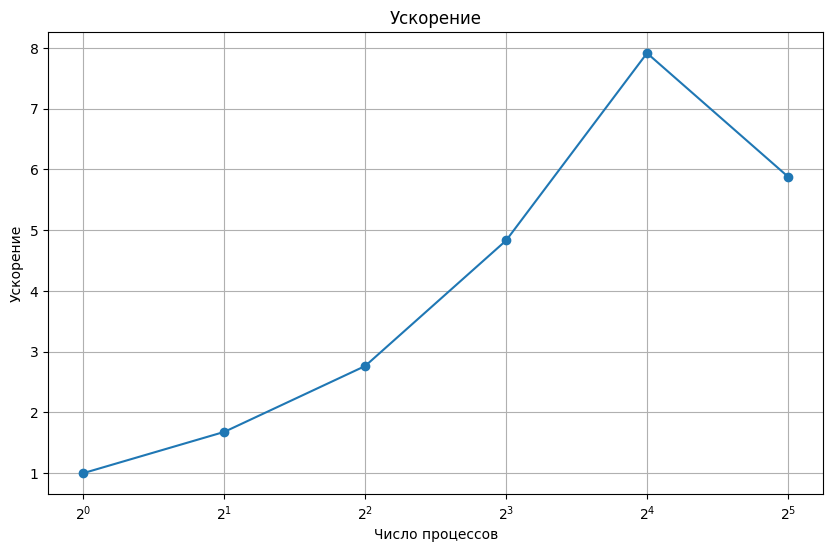

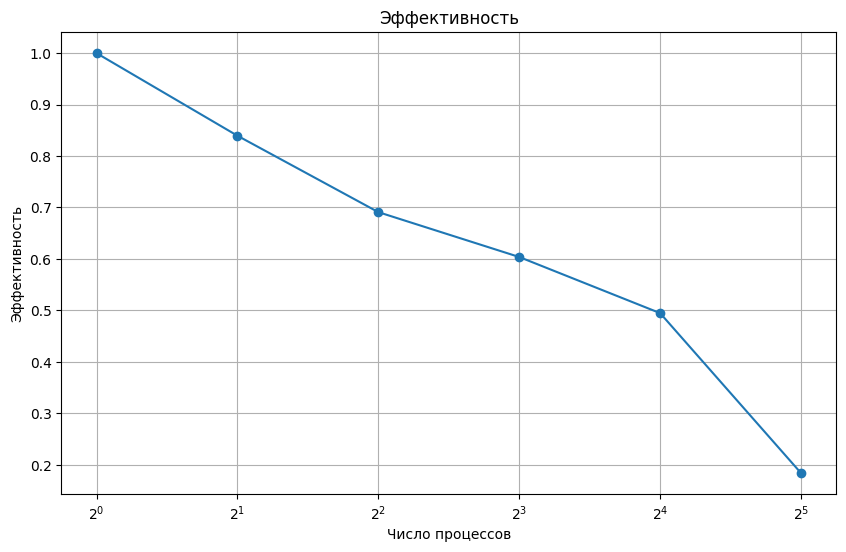

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
data = []
with open("task/performance1.res", "r") as file:
    for line in file:
        match = re.match(r"Nx_global=(\d+), Processes=(\d+), Total_Time=([\d.]+)", line)
        if match:
            nx_global = int(match.group(1))
            processes = int(match.group(2))
            total_time = float(match.group(3))
            data.append({"Nx_global": nx_global, "Processes": processes, "Total_Time": total_time})


df = pd.DataFrame(data)

df_avg = df.groupby("Processes").mean().reset_index()
print(df_avg.iloc[0])

df_avg["Speedup"] = df_avg["Total_Time"].iloc[0] / df_avg["Total_Time"]
df_avg["Efficiency"] = df_avg["Speedup"] / df_avg["Processes"]

    
plt.figure(figsize=(10, 6))
plt.plot(df_avg["Processes"], df_avg["Total_Time"], marker='o')
plt.xlabel("Число процессов")
plt.ylabel("Время выполнения (с)")
plt.title("Общее время выполнения")
plt.xscale("log", base=2)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_avg["Processes"], df_avg["Speedup"], marker='o')
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")
plt.title("Ускорение")
plt.xscale("log", base=2)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_avg["Processes"], df_avg["Efficiency"], marker='o')
plt.xlabel("Число процессов")
plt.ylabel("Эффективность")
plt.title("Эффективность")
plt.xscale("log", base=2)
plt.grid(True)
plt.show()


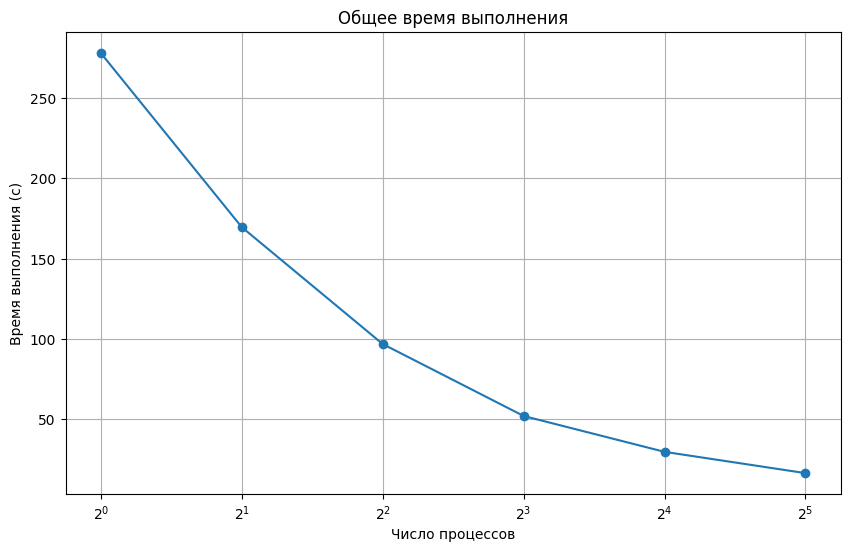

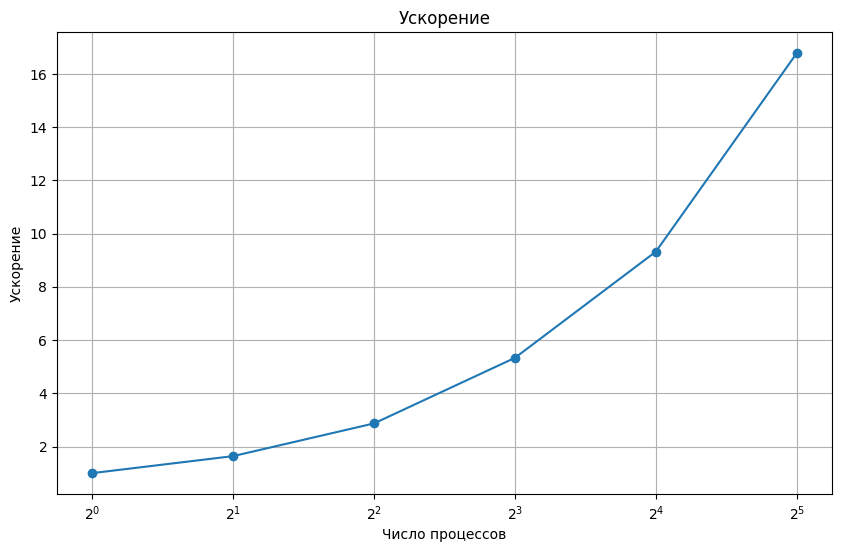

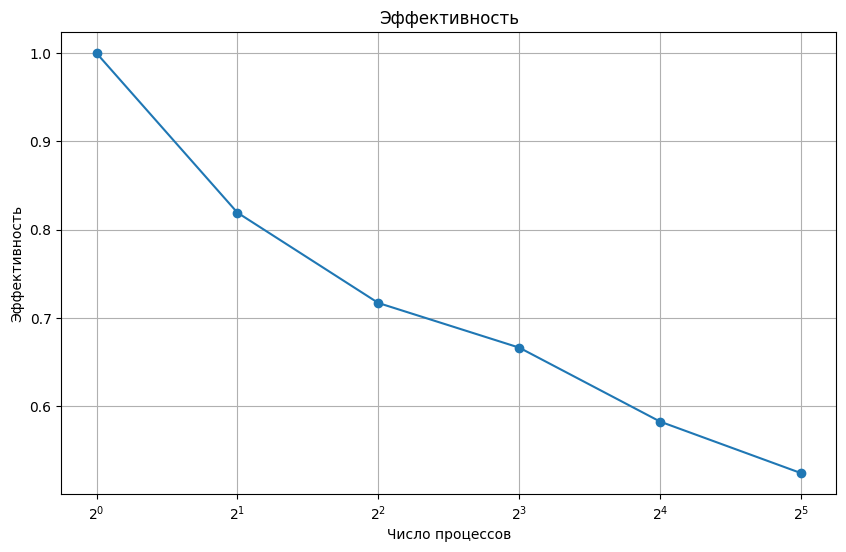

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
data = []
with open("task/performance.res", "r") as file:
    for line in file:
        match = re.match(r"Nx_global=(\d+), Processes=(\d+), Total_Time=([\d.]+)", line)
        if match:
            nx_global = int(match.group(1))
            processes = int(match.group(2))
            total_time = float(match.group(3))
            data.append({"Nx_global": nx_global, "Processes": processes, "Total_Time": total_time})


df = pd.DataFrame(data)

df_avg = df.groupby("Processes").mean().reset_index()

df_avg["Speedup"] = df_avg["Total_Time"].iloc[0] / df_avg["Total_Time"]
df_avg["Efficiency"] = df_avg["Speedup"] / df_avg["Processes"]


plt.figure(figsize=(10, 6))
plt.plot(df_avg["Processes"], df_avg["Total_Time"], marker='o')
plt.xlabel("Число процессов")
plt.ylabel("Время выполнения (с)")
plt.title("Общее время выполнения")
plt.xscale("log", base=2)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_avg["Processes"], df_avg["Speedup"], marker='o')
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")
plt.title("Ускорение")
plt.xscale("log", base=2)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_avg["Processes"], df_avg["Efficiency"], marker='o')
plt.xlabel("Число процессов")
plt.ylabel("Эффективность")
plt.title("Эффективность")
plt.xscale("log", base=2)
plt.grid(True)
plt.show()


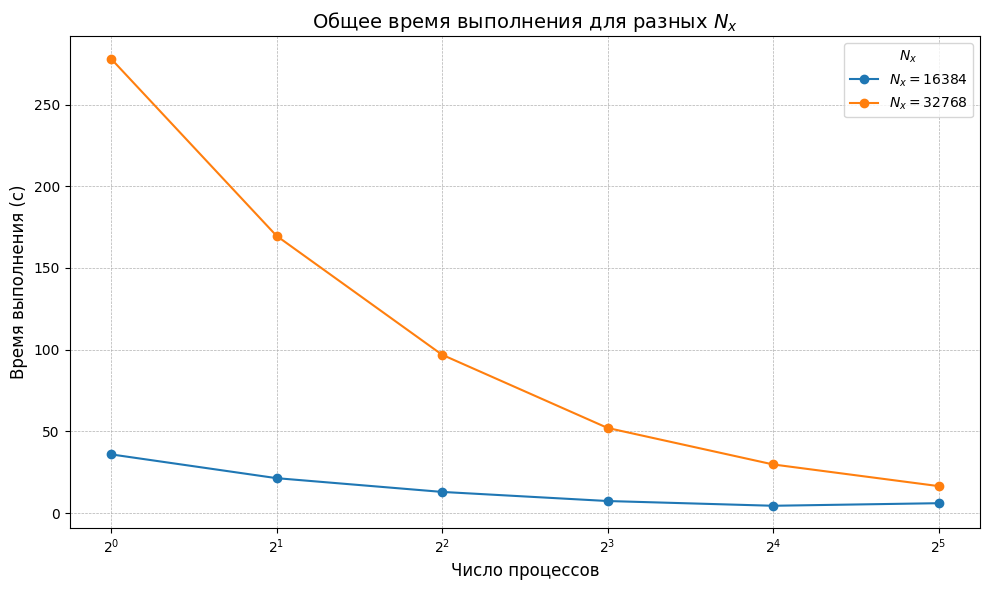

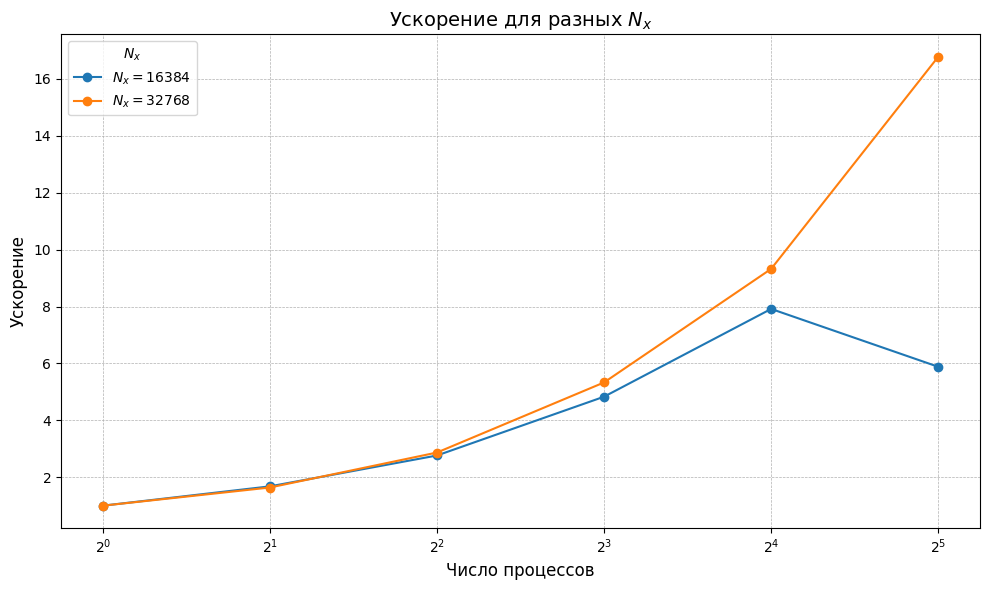

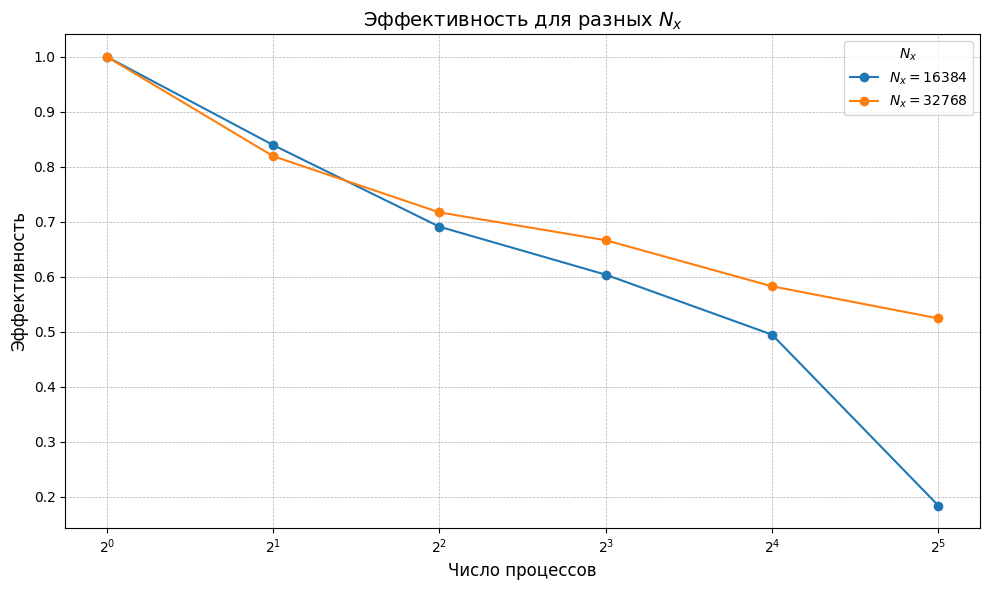

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re


data = []
with open("task/perfomance.combined.res", "r") as file:
    for line in file:
        match = re.match(r"Nx_global=(\d+), Processes=(\d+), Total_Time=([\d.]+)", line)
        if match:
            nx_global = int(match.group(1))
            processes = int(match.group(2))
            total_time = float(match.group(3))
            data.append({"Nx_global": nx_global, "Processes": processes, "Total_Time": total_time})

df = pd.DataFrame(data)


df_avg = df.groupby(["Nx_global", "Processes"]).mean().reset_index()


df_avg["Speedup"] = df_avg.groupby("Nx_global")["Total_Time"].transform(lambda x: x.iloc[0] / x)
df_avg["Efficiency"] = df_avg["Speedup"] / df_avg["Processes"]


nx_values = df_avg["Nx_global"].unique()


plt.figure(figsize=(10, 6))
for nx in nx_values:
    subset = df_avg[df_avg["Nx_global"] == nx]
    plt.plot(subset["Processes"], subset["Total_Time"], marker="o", label=f"$N_x = {nx}$")
plt.xlabel("Число процессов", fontsize=12)
plt.ylabel("Время выполнения (с)", fontsize=12)
plt.title("Общее время выполнения для разных $N_x$", fontsize=14)
plt.xscale("log", base=2)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="$N_x$", fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for nx in nx_values:
    subset = df_avg[df_avg["Nx_global"] == nx]
    plt.plot(subset["Processes"], subset["Speedup"], marker="o", label=f"$N_x = {nx}$")
plt.xlabel("Число процессов", fontsize=12)
plt.ylabel("Ускорение", fontsize=12)
plt.title("Ускорение для разных $N_x$", fontsize=14)
plt.xscale("log", base=2)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="$N_x$", fontsize=10)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
for nx in nx_values:
    subset = df_avg[df_avg["Nx_global"] == nx]
    plt.plot(subset["Processes"], subset["Efficiency"], marker="o", label=f"$N_x = {nx}$")
plt.xlabel("Число процессов", fontsize=12)
plt.ylabel("Эффективность", fontsize=12)
plt.title("Эффективность для разных $N_x$", fontsize=14)
plt.xscale("log", base=2)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="$N_x$", fontsize=10)
plt.tight_layout()
plt.show()
